In [41]:
#Import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [42]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
data.shape

(284807, 31)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

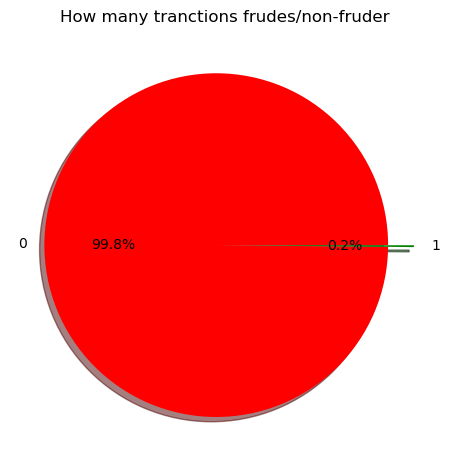

In [45]:
#find the how many classes in the dataset
class_val=data['Class'].value_counts()
index=class_val.index
plt.pie(class_val,labels=index,autopct='%1.1f%%',colors=['red','green'],explode=[0.05,0.1],shadow=True)
plt.title("How many tranctions frudes/non-fruder")
plt.tight_layout()
plt.show()

**From the above diagram less number of fraud transaction done. The data set have some imblanced then we need to covert it**

In [46]:
#Checking the null values in the dataset
data.isna().sum()/len(data)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [47]:
#Checking the duplicate values
duplicated=data.duplicated().sum()/len(data)
print(f'The dataset contains {duplicated*100:.2f} duplicated values we remove it')

The dataset contains 0.38 duplicated values we remove it


# Remove the duplicated values in the dataset 

In [48]:
#remove the duplicates from the dataset
data=data.drop_duplicates()

# Model Selection

In [49]:
#Divided the data into independent and dependent variable
X=data.drop(['Class'],axis=1)
y=data.Class
#train and the test and split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Buliding

In [50]:
logistic=LogisticRegression()
cv=KFold(n_splits=10,shuffle=False,random_state=None)
grid={'C':10.0*np.arange(-3,3),'penalty':['l1','l2']}
clf=GridSearchCV(logistic,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([-30., -20., -10.,   0.,  10.,  20.]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [51]:
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9990307686885419
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.74      0.60      0.66        90

    accuracy                           1.00     56746
   macro avg       0.87      0.80      0.83     56746
weighted avg       1.00      1.00      1.00     56746

[[56637    19]
 [   36    54]]


In [52]:
#RandomForest Classifier
random=RandomForestClassifier(class_weight=dict({0:1,1:100}))
random.fit(X_train,y_train)
y_pred_ranodm=random.predict(X_test)
print(accuracy_score(y_test,y_pred_ranodm))
print(classification_report(y_test,y_pred_ranodm))
print(confusion_matrix(y_test,y_pred_ranodm))

0.9994889507630493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.70      0.81        90

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[[56654     2]
 [   27    63]]


# Doing the data imbalanced techniques

In [55]:
from collections import Counter
Counter(y_train)

Counter({0: 226597, 1: 383})

In [59]:
#We need some imbalanced techniques
from imblearn.under_sampling import NearMiss
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 226597, 1: 383})
The number of classes after fit Counter({0: 383, 1: 383})


In [61]:
random=RandomForestClassifier()
random.fit(X_train_ns,y_train_ns)
random_pred=random.predict(X_test)
print(accuracy_score(y_test,random_pred))
print(classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))

0.6961019278891905
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     56656
           1       0.00      0.92      0.01        90

    accuracy                           0.70     56746
   macro avg       0.50      0.81      0.42     56746
weighted avg       1.00      0.70      0.82     56746

[[39418 17238]
 [    7    83]]


In [63]:
#Another sampling techinque 
from imblearn.over_sampling import RandomOverSampler
ran=RandomOverSampler(random_state=42)
X_train_ran,y_train_ran=ran.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ran)))

The number of classes before fit Counter({0: 226597, 1: 383})
The number of classes after fit Counter({0: 226597, 1: 226597})


In [64]:
random=RandomForestClassifier()
random.fit(X_train_ran,y_train_ran)
random_pred=random.predict(X_test)
print(accuracy_score(y_test,random_pred))
print(classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))

0.9995594403129736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.74      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

[[56654     2]
 [   23    67]]


In [65]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))
random=RandomForestClassifier()
random.fit(X_train_sm,y_train_sm)
random_pred=random.predict(X_test)
print(accuracy_score(y_test,random_pred))
print(classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))

The number of classes before fit Counter({0: 226597, 1: 383})
The number of classes after fit Counter({0: 226597, 1: 226597})
0.9995241955380115
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.73      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[[56653     3]
 [   24    66]]


In [66]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))
random=RandomForestClassifier()
random.fit(X_train_os,y_train_os)
random_pred=random.predict(X_test)
print(accuracy_score(y_test,random_pred))
print(classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))

The number of classes before fit Counter({0: 226597, 1: 383})
The number of classes after fit Counter({0: 226597, 1: 226597})
0.9995241955380115
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.73      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[[56653     3]
 [   24    66]]
